In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'1.13.1'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [0]:
x_valid,X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0

In [0]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
                            

In [0]:
class_names=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Sneaker","Bag","AnkleBoot"]

In [16]:
class_names[y_train[0]]

'Coat'

In [0]:
model=keras.models.Sequential()

In [0]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers

In [34]:
model.layers[1].name

'dense_6'

In [38]:
model.get_layer('dense_6').name

'dense_6'

In [0]:
hidden=model.layers[1]
weights,biases=hidden.get_weights()

In [41]:
weights


array([[-0.0378429 ,  0.00414239, -0.00847181, ...,  0.0145461 ,
        -0.04335947, -0.03440122],
       [-0.00828677,  0.06715553, -0.05328863, ...,  0.05654941,
         0.00801552, -0.0271218 ],
       [ 0.04814406, -0.05402654,  0.01960523, ..., -0.04529561,
         0.01253309,  0.00848152],
       ...,
       [-0.04711731,  0.01668167,  0.05271862, ..., -0.04633826,
         0.05103989,  0.07363017],
       [-0.06306245, -0.03984424, -0.01066895, ..., -0.02609744,
         0.02803755,  0.05994272],
       [ 0.06718999,  0.07084282, -0.04599981, ...,  0.03239924,
         0.01048077,  0.00954158]], dtype=float32)

In [42]:
weights.shape

(784, 300)

In [43]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [44]:
biases.shape

(300,)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=['accuracy'])

In [48]:
history=model.fit(X_train,y_train,epochs=30,validation_data=[x_valid,y_valid])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 168us/sample - loss: 0.7160 - acc: 0.7626 - val_loss: 0.5284 - val_acc: 0.8260
Epoch 2/30
55000/55000 [==============================] - 9s 158us/sample - loss: 0.4921 - acc: 0.8271 - val_loss: 0.4414 - val_acc: 0.8516
Epoch 3/30
55000/55000 [==============================] - 8s 148us/sample - loss: 0.4459 - acc: 0.8440 - val_loss: 0.4234 - val_acc: 0.8582
Epoch 4/30
55000/55000 [==============================] - 8s 150us/sample - loss: 0.4190 - acc: 0.8521 - val_loss: 0.4068 - val_acc: 0.8538
Epoch 5/30
55000/55000 [==============================] - 9s 159us/sample - loss: 0.3993 - acc: 0.8586 - val_loss: 0.3903 - val_acc: 0.8664
Epoch 6/30
55000/55000 [==============================] - 10s 184us/sample - loss: 0.3824 - acc: 0.8632 - val_loss: 0.3752 - val_acc: 0.8714
Epoch 7/30
55000/55000 [==============================] - 10s 178us/sample - loss: 0.3689 - acc: 0.8691 - val_

In [50]:
history

In [51]:
history1=model.fit(X_train_full/255.0,y_train_full,epochs=30,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 8s 152us/sample - loss: 0.2331 - acc: 0.9158 - val_loss: 0.2346 - val_acc: 0.9140
Epoch 2/30
54000/54000 [==============================] - 8s 151us/sample - loss: 0.2287 - acc: 0.9181 - val_loss: 0.2401 - val_acc: 0.9150
Epoch 3/30
54000/54000 [==============================] - 8s 151us/sample - loss: 0.2238 - acc: 0.9193 - val_loss: 0.2590 - val_acc: 0.9048
Epoch 4/30
54000/54000 [==============================] - 9s 158us/sample - loss: 0.2201 - acc: 0.9213 - val_loss: 0.2520 - val_acc: 0.9060
Epoch 5/30
54000/54000 [==============================] - 8s 151us/sample - loss: 0.2176 - acc: 0.9213 - val_loss: 0.2453 - val_acc: 0.9068
Epoch 6/30
54000/54000 [==============================] - 8s 148us/sample - loss: 0.2130 - acc: 0.9235 - val_loss: 0.2556 - val_acc: 0.9003
Epoch 7/30
54000/54000 [==============================] - 8s 152us/sample - loss: 0.2096 - acc: 0.9252 - val_lo

In [60]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'samples': 55000,
 'steps': None,
 'verbose': 0}

In [55]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

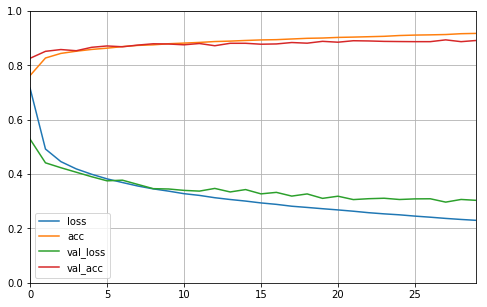

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=[8,5])
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.legend()
plt.show()

In [62]:
model.evaluate(X_test,y_test)#gives loss and accuracy 

10000/10000 [==============================] - 1s 63us/sample - loss: 2.4332 - acc: 0.8471


[2.433238965034483, 0.8471]

In [53]:

X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
model.predict_classes(X_new)

array([9, 2, 1])

In [0]:
#keras has predefined warm state